In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from mrmr import mrmr_classif

In [35]:
df = pd.read_csv('data/Homininos_DataSet.csv')

print(df['Tecno'].value_counts())

Tecno
1    390
2    300
0     30
Name: count, dtype: int64


In [36]:
""" Now with all features cleaned, we can perform mRMR on the data"""
target = 'Tecno'
features = df.columns.tolist()
features.remove(target)
features.remove('Tecno_type')


selectedFeatures = mrmr_classif(X=df[features], y=df[target], K=len(features))
selectedFeatures = selectedFeatures[:10]
print(f'selected features: {selectedFeatures}')

scaler = StandardScaler()
df["Cranial_Capacity"] = scaler.fit_transform(df["Cranial_Capacity"].values.reshape(-1, 1))

# selectedFeatures = ['Arms', 'Tooth_Enamel', 'Sexual_Dimorphism', 'Cranial_Capacity']
print(f'Arms unique values: {sorted(df["Arms"].unique())}')
print(f'Tooth_Enamel unique values: {sorted(df["Tooth_Enamel"].unique())}')
print(f'Sexual_Dimorphism unique values: {sorted(df["Sexual_Dimorphism"].unique())}')
print(f'Cranial_Capacity unique values: {list(df["Cranial_Capacity"][0:5])}')

100%|██████████| 26/26 [00:05<00:00,  5.07it/s]

selected features: ['Arms', 'Tooth_Enamel', 'Sexual_Dimorphism', 'Cranial_Capacity', 'Canines_Shape', 'Foots', 'Migrated', 'Current_Country', 'Location', 'Height']
Arms unique values: [0, 1, 2]
Tooth_Enamel unique values: [0, 1, 2, 3, 4, 5, 6]
Sexual_Dimorphism unique values: [0, 1, 2]
Cranial_Capacity unique values: [0.40784077023395937, -1.4736514109678496, -1.0750379764625926, 1.677164294091647, 1.554069845629913]


Average F1 score: 1.0


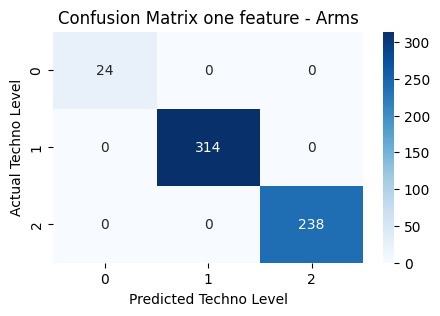

In [37]:
""" Perform a SVM classification on the data"""
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer, confusion_matrix

X = df[selectedFeatures]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = SVC(kernel='linear')

scorer = make_scorer(f1_score, average='weighted')
average_f1 = cross_val_score(model, X_train, y_train, cv=2, scoring=scorer)
print(f'Average F1 score: {np.mean(average_f1)}')

y_pred = cross_val_predict(model, X_train, y_train, cv=2)
conf_matrix = confusion_matrix(y_train,  y_pred) 

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Techno Level')
plt.ylabel('Actual Techno Level')
plt.title('Confusion Matrix one feature - Arms')
plt.show()

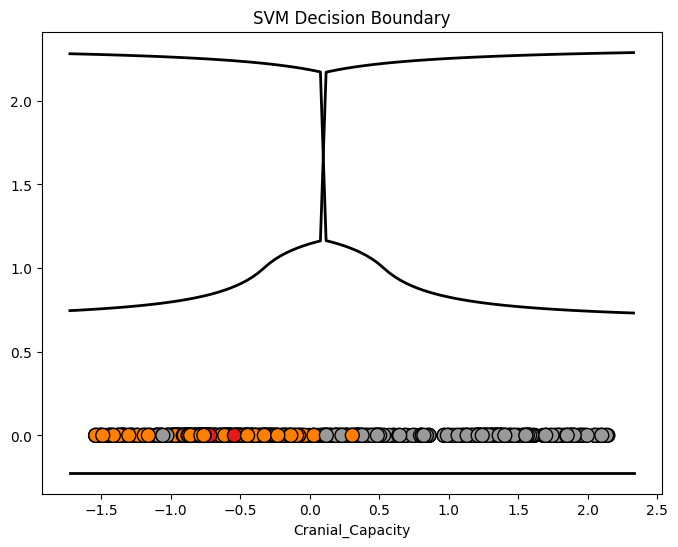

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate synthetic data with two features for demonstration
X = np.array(df["Cranial_Capacity"]).reshape(-1, 1)
y = np.array(df[target])

# Train an SVM classifier
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plot decision boundary and data points
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[:, 0], np.zeros_like(X[:, 0]), c=y, cmap='Set1', edgecolor='k', s=100)

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100).reshape(-1, 1)
yy = clf.decision_function(xx)
yy_decision = yy[:, 2]
# print(f'yy shape: {yy.shape}')
# yy = yy.reshape(xx.shape)  # Corrected reshaping

# Plot decision boundary
ax.plot(xx, yy, color='k', linestyle='-', linewidth=2)

plt.xlabel('Cranial_Capacity')
plt.title('SVM Decision Boundary')

plt.show()




X shape: (100, 2)
y shape: (100,)
X shape: (100, 2)
y shape: (100,)


ValueError: cannot reshape array of size 30000 into shape (100,100)

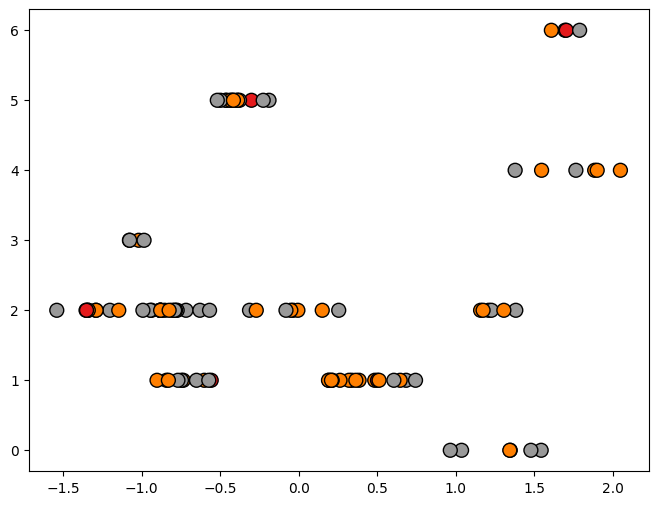

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate synthetic data with two features for demonstration
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X = np.array(df[["Cranial_Capacity", "Tooth_Enamel"]].sample(100))
y = np.array(df[target].sample(100))
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

# sys.exit()

# Train an SVM classifier with a linear kernel
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plot decision boundary and data points
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', edgecolor='k', s=100)

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a meshgrid to evaluate model predictions
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
xy = np.column_stack([xx.ravel(), yy.ravel()])

# Compute decision function values for each point in the meshgrid
Z = clf.decision_function(xy).reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')

plt.show()
